In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

## Reading dataset containing historical stock prices for 
1. Facebook
2. Google 

In [2]:
facebook = pd.read_csv("fb.txt")
google = pd.read_csv("google.txt")

In [3]:
import datetime as dt 

def to_datetime(date):
    return dt.datetime.strptime(date,"%Y-%m-%d")

files = [facebook,google]
for company in files:
    company["Date"] = company["Date"].apply(to_datetime)

## Exploring the dataset - Basic Visualisation

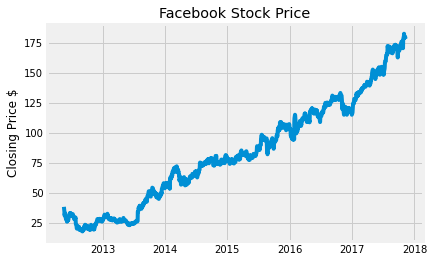

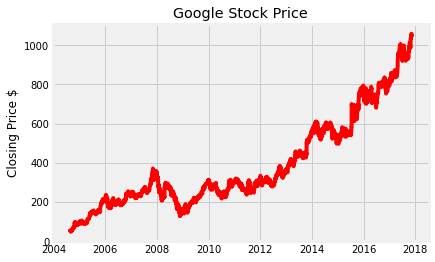

In [4]:
plt.plot(facebook["Date"],facebook["Close"])
plt.title("Facebook Stock Price")
plt.ylabel("Closing Price $")
plt.show()

plt.plot(google["Date"],google["Close"],"r")
plt.title("Google Stock Price")
plt.ylabel("Closing Price $")
plt.show()

## Forecasting model with Prophet (by FB)

In [5]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [6]:
date = "2015-11-10"
# facebook_before contains record of only 2 years before the latest record 
facebook_before = facebook[facebook["Date"] < dt.datetime.strptime(date,"%Y-%m-%d")]
facebook_after = facebook[facebook["Date"] > dt.datetime.strptime(date,"%Y-%m-%d")]

In [7]:
def predictTrend(df,days_ahead,sensitivity,x_col,y_col):
    df['ds'] = df[x_col]
    df['y'] = df[y_col]
    ## Precondition: The date column must be renamed to 'ds' and the value column must be renamed to 'y'
    the_prophet = fbprophet.Prophet(changepoint_prior_scale=sensitivity)
    the_prophet.fit(df)
    forecast = the_prophet.make_future_dataframe(periods=days_ahead,freq='D')
    forecast = the_prophet.predict(forecast)
    the_prophet.plot(forecast,xlabel='Date',ylabel='Stock Closing Price')

## Testing our model

C:\Users\leong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\leong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


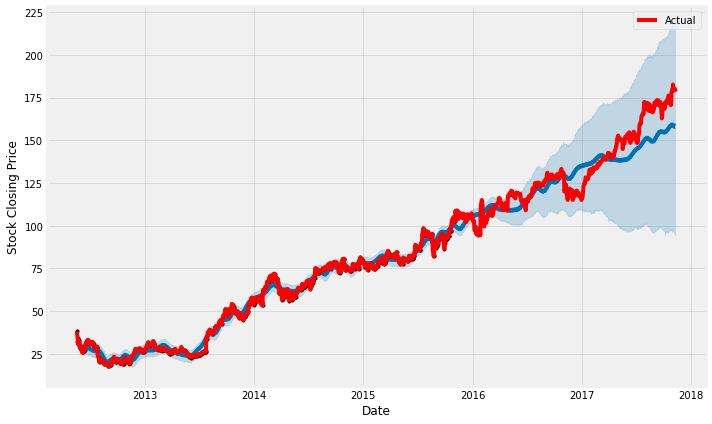

In [8]:
predictTrend(facebook_before,730,0.05,"Date","Close")
# Compare it with the actual value 
plt.plot(facebook["Date"],facebook["Close"],"r",label="Actual")
plt.legend()

<font size = 3> The light blue shade is the uncertainty of our prediction. It varies a lot as we are predicting two years ahead. </font>

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


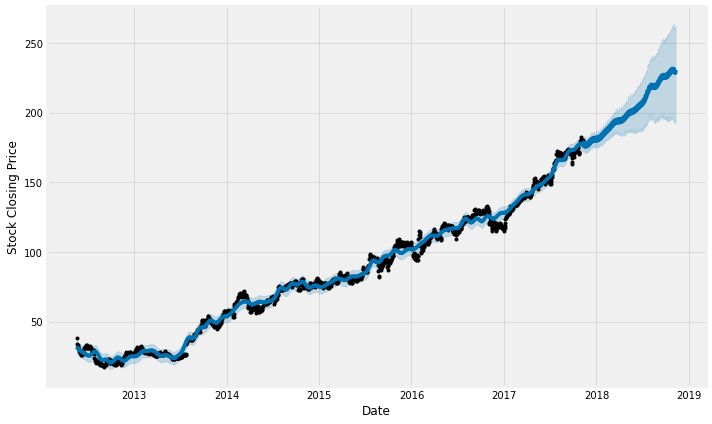

In [9]:
predictTrend(facebook,365,0.05,"Date","Close")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


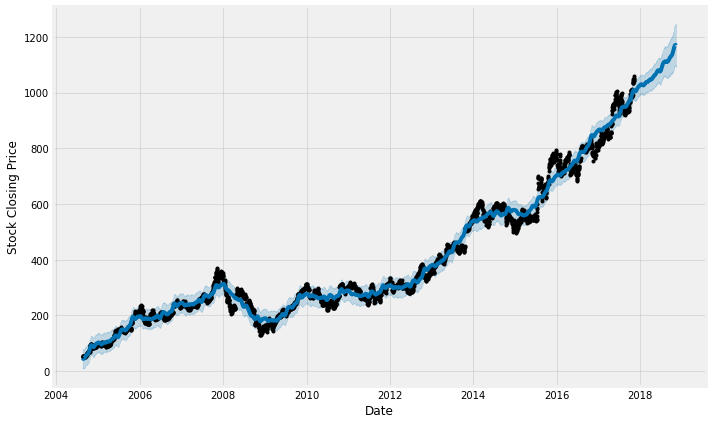

In [11]:
predictTrend(google,365,0.05,"Date","Close")